In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
def f(x):
    return 3*x**2 - 4*x + 5  

In [5]:
f(3.0)

20.0

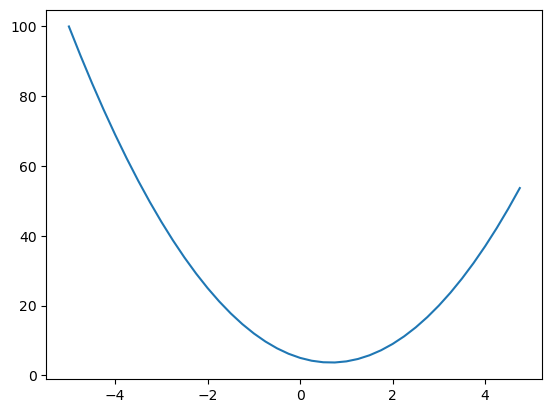

In [6]:
x_s = np.arange(-5, 5, 0.25)
y_s = f(x_s)

y_s

plt.plot(x_s, y_s)

In [26]:
class Value: 
    def __init__(self, data, _childern=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_childern)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other ):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out 
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [27]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

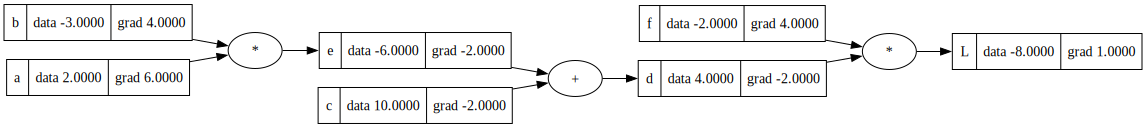

In [19]:
draw_dot(L)

In [29]:
Loss = d * f 
Loss

# we want to know what is dL/dd, derivative of L with respect to d. So if Loss = d(f).    dL/df = f, therefore any amount of change will be be 1 to 1 to the output of L

Value(data=-8.0)

In [30]:
# Manually Setting the graident. What is dL/dL.
# dL/df(f * d)

L.grad = 1.0
f.grad = 4.0
d.grad = -2.0 


In [31]:
# Understanding how c affects L is slightly tricky because there is an intermediate variable, d, between them.

# First, we examine how c affects d. From the graph:
#     d = c + e

# Since e is constant, we have:
#     dd/dc = d/dc(c + e) = 1

# Next, L depends on d:
#     L = f * d
#     L = f * (e + c)

# Next, d/dc (L) => d/dc (f * (e + c)) = f 


# So:
#     dL/dc = dL/dd * dd/dc = f * 1 = f

# Given f = -2, the derivative dL/dc = -2.

c.grad = -2.0
e.grad = -2.0


In [32]:
# Lastly, calculate Leaf Node
# Find: dL/da and dL/db

a.grad = -2.0 * -3.0 # dL/da = (dL/de) * (de/da)
b.grad = -2.0 * -2.0

In [33]:
# Now that we have a full backward pass or backward propagation, as an example, we want to try and increase the value of L
# since a's gradient is positive, positive is the direction we want to increase.

a.data += a.grad * 0.01 # where 0.01 is the step size. 

# now we just want to nudge the all leaf nodes so that it increases the value of L 
b.data += b.grad * 0.01 # where 0.01 is the step size. 
c.data += c.grad * 0.01 # where 0.01 is the step size. 
f.data += f.grad * 0.01 # where 0.01 is the step size. 

# Forward Pass
e = a * b;
d = e + c; 
L = d * f

L.data 


-46.774224000000004

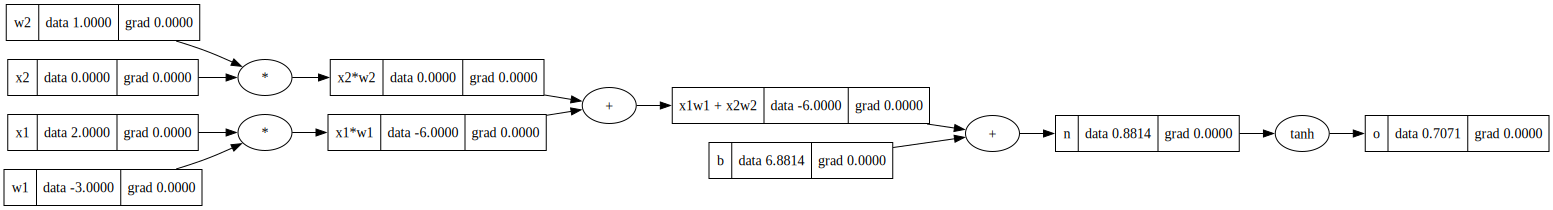

In [66]:
# initialize input values for forward pass

# two input values 
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# two weights
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# 1 bias for each neuron, trigger happy value. Positive bias makes it easier for the neuron to activate as it gets passed into the activation function. 
b = Value(6.8813735870195432, label='b')

# Putting everything together. x1w1 + x2w2 + b
x1w1 = x1 * w1; x1w1.label = "x1*w1"
x2w2 = x2 * w2; x2w2.label = "x2*w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1 + x2w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label = 'o'
draw_dot(o)


In [67]:
x1w1.grad = 0.5
x2w2.grad = 0.5
x1w1x2w2.grad = 0.5
b.grad = 0.5
n.grad = 0.5
o.grad = 1

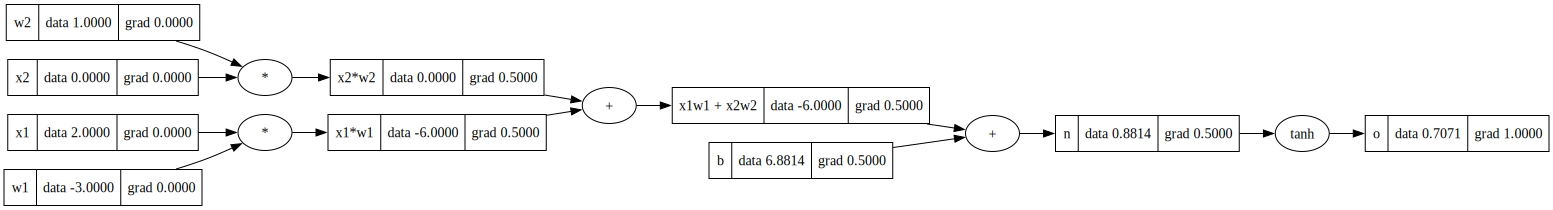

In [68]:
draw_dot(o)

In [69]:
x2.grad = w2.grad * x2w2.grad
w2.grad = x2.grad * x2w2.grad

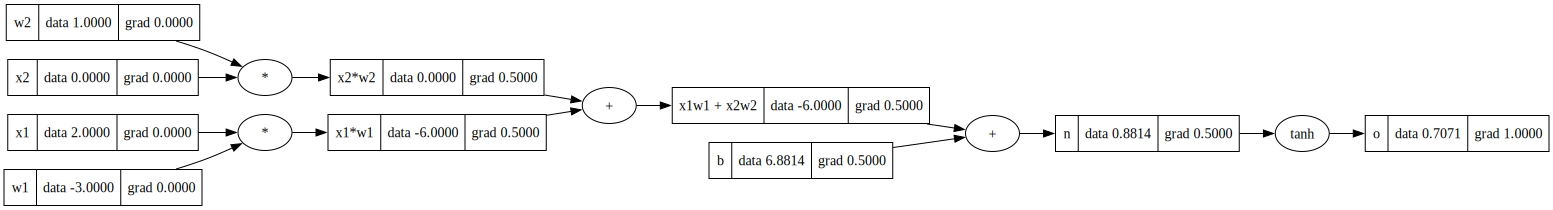

In [70]:
draw_dot(o)